In [527]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [528]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [529]:
from functions.blackscholes import BSOption

In [530]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [531]:
S = 100
K = 100
T = 0.25
r = 0.01
sigma = 0.3 
q = 0

call = BSOption("C", S, K, T, r, sigma, q=q)
call.price()

6.096736604446896

In [532]:
call.greeks()

{'Lambda': 8.8, 'Delta': 0.54, 'Gamma': 0.03, 'Theta': -12.39, 'Vega': 19.86}

In [533]:
put = BSOption("P", S, K, T, r, sigma, q=q)
put.price()

5.847048844192912

In [534]:
put.greeks()

{'Lambda': -7.93, 'Delta': -0.46, 'Gamma': 0.03, 'Theta': -11.4, 'Vega': 19.86}

## Call price versus strike price 

In [81]:
SS = np.linspace(80,120,100)
#S = 100
r = 0.01
T = 0.25
sigma = 0.3 
q = 0

K1 = 90
K2 = 100
K3 = 110

call1 = [ BSOption("C", s, K1, T, r, sigma, q=q) for s in SS ]
call2 = [ BSOption("C", s, K2, T, r, sigma, q=q) for s in SS ]
call3 = [ BSOption("C", s, K3, T, r, sigma, q=q) for s in SS ]

In [82]:
K = np.linspace(80,120,100)
S = 100
r = 0.01
T = 0.25
sigma = 0.3 
q = 0

Call1 = [ BSOption("C", S, k, T, r, sigma, q=q) for k in K ]

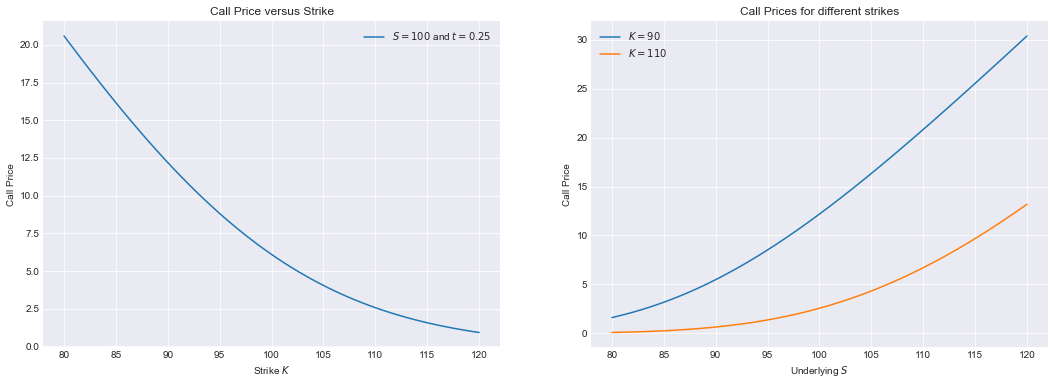

In [83]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

ax[0].plot(K, [c.price() for c in Call1], label="$S={:.0f}$ and $t=0.25$".format(S))
ax[0].set_title("Call Price versus Strike")
ax[0].set_xlabel("Strike $K$")
ax[0].set_ylabel("Call Price")
ax[0].grid()
ax[0].legend()

ax[1].plot(SS, [c.price() for c in call1], label="$K={:.0f}$".format(K1))
ax[1].plot(SS, [c.price() for c in call3], label="$K={:.0f}$".format(K3))
ax[1].set_title("Call Prices for different strikes")
ax[1].set_xlabel("Underlying $S$")
ax[1].set_ylabel("Call Price")
ax[1].grid()
ax[1].legend()

plt.show()

## Call Option bounds 

In [13]:
# Fix a strike and the rest of parameters
K = 50
r = 0.01
sigma = 0.3 
q = 0

# Set of underlyings
S = np.linspace(0.01,100,200)

# Set of maturities
T = [100, 20, 8, 0]

# Calls and Puts
call1 = [df.BSOption("C", s, K, T[0], r, sigma, q=q) for s in S]
call2 = [df.BSOption("C", s, K, T[1], r, sigma, q=q) for s in S]
call3 = [df.BSOption("C", s, K, T[2], r, sigma, q=q) for s in S]
call4 = [df.BSOption("C", s, K, T[3], r, sigma, q=q) for s in S]

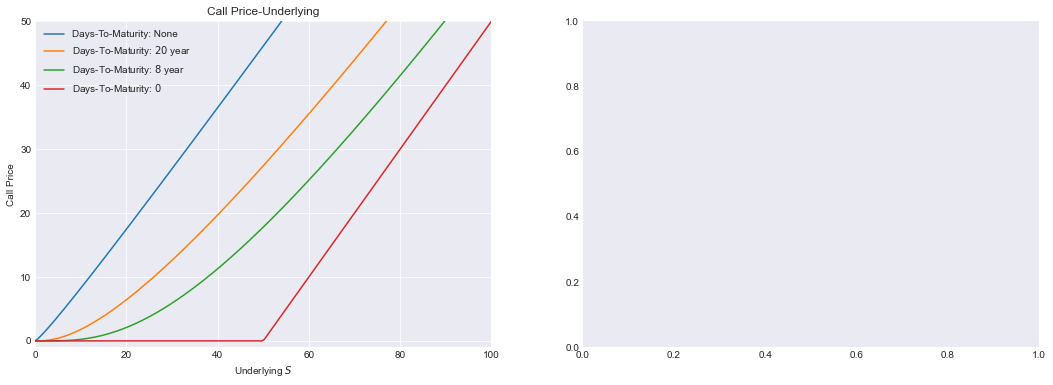

In [14]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(S, [c.price() for c in call1], label="Days-To-Maturity: None")
ax[0].plot(S, [c.price() for c in call2], label="Days-To-Maturity: ${:.0f}$ year".format(T[1]))
ax[0].plot(S, [c.price() for c in call3], label="Days-To-Maturity: ${:.0f}$ year".format(T[2]))
ax[0].plot(S, [c.price() for c in call4], label="Days-To-Maturity: $0$")
ax[0].set_title("Call Price-Underlying")
ax[0].set_xlabel("Underlying $S$") # (Strike $K={:.0f}$)".format(K))
ax[0].set_ylabel("Call Price")
ax[0].set_ylim([-1,50])
ax[0].set_xlim([0,100])
ax[0].grid()
ax[0].legend()

plt.show()

## Option Return versus Underlying return

In [15]:
# Fix a strike and the rest of parameters
K = 100
r = 0.01
T = 0.3
sigma = 0.3 
q = 0

# Calls
S = np.linspace(80,120,25)
#
calls = [ df.BSOption("C", s, K, T, r, sigma, q=q) for s in S]

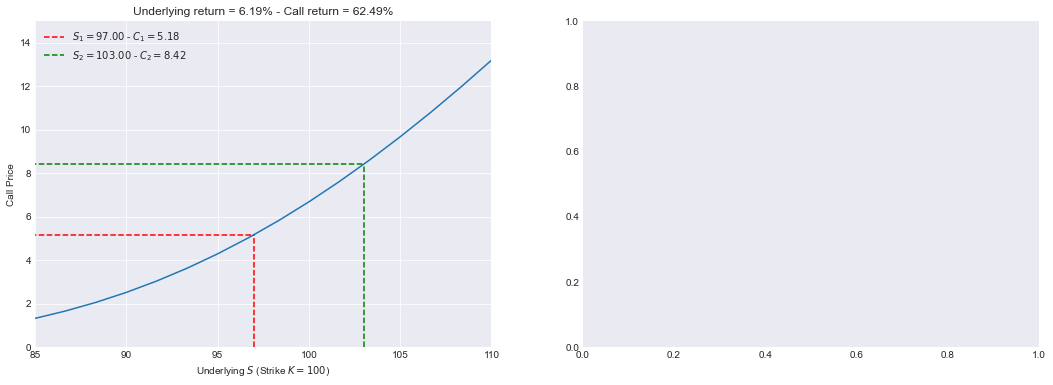

In [16]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(S, [c.price() for c in calls], label="")

S1 = 97
C1 = df.BSOption("C", S1, K, T, r, sigma, q=q).price()
ax[0].plot([S1, S1], [0, C1], c='red', linestyle="--") 
ax[0].plot([0, S1], [C1, C1], 
           c='red', 
           linestyle="--", 
           label="$S_1={:.2f}$ - $C_1={:.2f}$".format(S1,C1)) 

S2 = 103
C2 = df.BSOption("C", S2, K, T, r, sigma, q=q).price()
ax[0].plot([S2, S2], [0, C2], c='green', linestyle="--") 
ax[0].plot([0, S2], [C2, C2], 
           c='green', 
           linestyle="--", 
           label="$S_2={:.2f}$ - $C_2={:.2f}$".format(S2,C2)) 

ax[0].set_title("Underlying return = {:.2f}% - Call return = {:.2f}%".format((S2/S1-1)*100, (C2/C1-1)*100))
ax[0].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[0].set_ylabel("Call Price")
ax[0].set_ylim([0,15])
ax[0].set_xlim([85,110])
ax[0].grid()
ax[0].legend()

plt.show()

## Moneyness of Calls and Puts

In [17]:
# Fix a strike and the rest of parameters
K = 100
r = 0.01
T = 0.25
sigma = 0.3 
q = 0

# Calls
SC_OTM = np.linspace(80,99,25)
SC_ATM = np.linspace(99,101,10)
SC_ITM = np.linspace(101,120,25)
#
calls_OTM = [ df.BSOption("C", s, K, T, r, sigma, q=q) for s in SC_OTM ]
calls_ATM = [ df.BSOption("C", s, K, T, r, sigma, q=q) for s in SC_ATM ]
calls_ITM = [ df.BSOption("C", s, K, T, r, sigma, q=q) for s in SC_ITM ]


# Puts
SP_ITM = np.linspace(80,99,25)
SP_ATM = np.linspace(99,101,10)
SP_OTM = np.linspace(101,120,25)
#
puts_ITM = [ df.BSOption("P", s, K, T, r, sigma, q=q) for s in SP_ITM ]
puts_ATM = [ df.BSOption("P", s, K, T, r, sigma, q=q) for s in SP_ATM ]
puts_OTM = [ df.BSOption("P", s, K, T, r, sigma, q=q) for s in SP_OTM ]

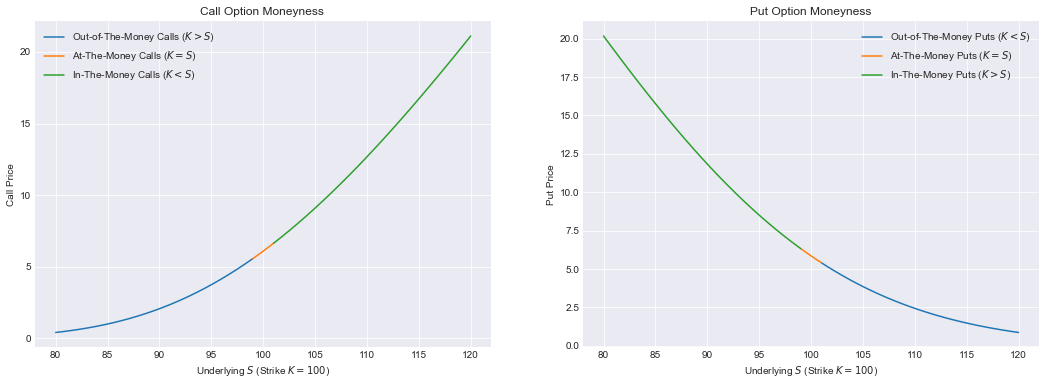

In [18]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(SC_OTM, [c.price() for c in calls_OTM], label="Out-of-The-Money Calls ($K > S$)")
ax[0].plot(SC_ATM, [c.price() for c in calls_ATM], label="At-The-Money Calls ($K = S$)")
ax[0].plot(SC_ITM, [c.price() for c in calls_ITM], label="In-The-Money Calls ($K < S$)")
ax[0].set_title("Call Option Moneyness ")
ax[0].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[0].set_ylabel("Call Price")
ax[0].grid()
ax[0].legend()

# Puts
ax[1].plot(SP_OTM, [p.price() for p in puts_OTM], label="Out-of-The-Money Puts ($K < S$)")
ax[1].plot(SP_ATM, [p.price() for p in puts_ATM], label="At-The-Money Puts ($K = S$)")
ax[1].plot(SP_ITM, [p.price() for p in puts_ITM], label="In-The-Money Puts ($K > S$)")
ax[1].set_title("Put Option Moneyness")
ax[1].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[1].set_ylabel("Put Price")
ax[1].grid()
ax[1].legend()

plt.show()

#### ITM Call

In [19]:
n = 12
Sn = SC_ITM[n]
Cn = [c.price() for c in calls_ITM][n]
intr_value = max(Sn - K,0)
time_value = Cn - intr_value

round(Sn,2), round(Cn,2), round(intr_value,2), round(time_value,2)

(110.5, 13.06, 10.5, 2.56)

#### OTM Call

In [20]:
n = 18
Sn = SC_OTM[n]
Cn = [c.price() for c in calls_OTM][n]
intr_value = max(Sn - K,0)
time_value = Cn - intr_value

round(Sn,2), round(Cn,2), round(intr_value,2), round(time_value,2)

(94.25, 3.46, 0, 3.46)

#### ITM Put

In [21]:
n = 12
Sn = SP_ITM[n]
Pn = [p.price() for p in puts_ITM][n]
intr_value = max(K - Sn,0)
time_value = Pn - intr_value

round(Sn,2), round(Pn,2), round(intr_value,2), round(time_value,2)

(89.5, 12.19, 10.5, 1.69)

#### OTM Put

In [22]:
n = 10
Sn = SP_OTM[n]
Pn = [p.price() for p in puts_OTM][n]
intr_value = max(K - Sn,0)
time_value = Pn - intr_value

round(Sn,2), round(Pn,2), round(intr_value,2), round(time_value,2)

(108.92, 2.69, 0, 2.69)

## The effect of time: price evolution 

In [23]:
# Fix a strike and the rest of parameters
K = 100
r = 0.01
sigma = 0.3 
q = 0

# Set of underlyings
S = np.linspace(80,120,100)

# Set of maturities
T = [2.5, 1.5, 0.9, 0.3, 0.1, 0.05, 0.02, 0]

# Calls and Puts
calls = [ [df.BSOption("C", s, K, t, r, sigma, q=q) for s in S] for t in T]
puts  = [ [df.BSOption("P", s, K, t, r, sigma, q=q) for s in S] for t in T]

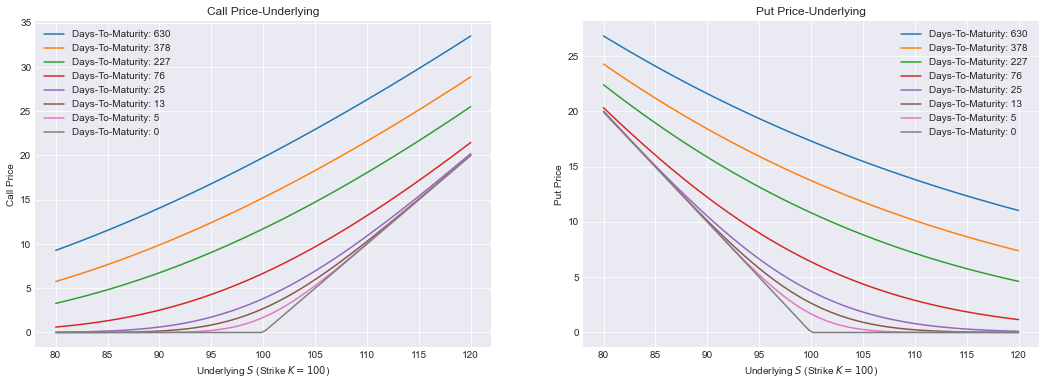

In [24]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
for t in range(len(T)):
    ax[0].plot(S, [c.price() for c in calls[t]], label="Days-To-Maturity: {:.0f} ".format(round(T[t]*252,0)))
ax[0].set_title("Call Price-Underlying")
ax[0].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[0].set_ylabel("Call Price")
ax[0].grid()
ax[0].legend()

# Puts
for t in range(len(T)):
    ax[1].plot(S, [p.price() for p in puts[t]], label="Days-To-Maturity: {:.0f} ".format(round(T[t]*252,0)))
ax[1].set_title("Put Price-Underlying")
ax[1].set_xlabel("Underlying $S$ (Strike $K=100$)")
ax[1].set_ylabel("Put Price")
ax[1].grid()
ax[1].legend()

plt.show()

## The effect of volatility: 

In [25]:
# Set of volatility 
sigmas = np.linspace(0.01,1,100)

# Rest of parameters
S = 100
K = 100
T = 1
q = 0

# Different interest rates
r_1 = 0.1
r_2 = 0.05
r_3 = 0.01

# Calls and Puts
calls_1 = [ df.BSOption("C", S, K, T, r_1, ss, q=q) for ss in sigmas ]
puts_1  = [ df.BSOption("P", S, K, T, r_1, ss, q=q) for ss in sigmas ]

calls_2 = [ df.BSOption("C", S, K, T, r_2, ss, q=q) for ss in sigmas ]
puts_2  = [ df.BSOption("P", S, K, T, r_2, ss, q=q) for ss in sigmas ]

calls_3 = [ df.BSOption("C", S, K, T, r_3, ss, q=q) for ss in sigmas ]
puts_3  = [ df.BSOption("P", S, K, T, r_3, ss, q=q) for ss in sigmas ]

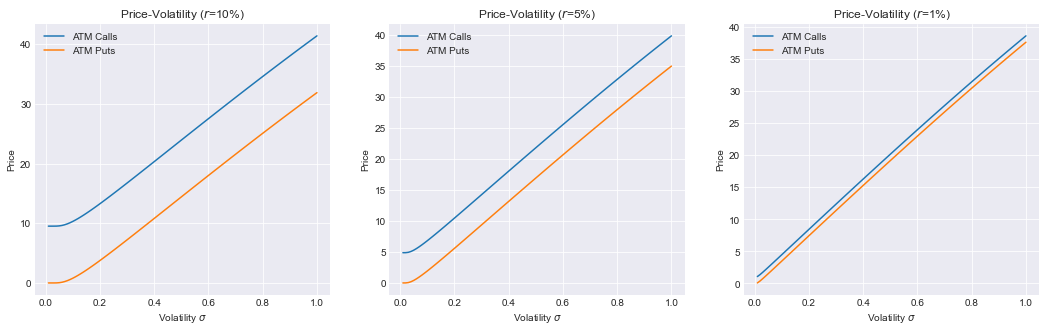

In [26]:
fig, ax = plt.subplots(1,3, figsize=(18,5)) 
ax = ax.flatten()

ax[0].plot(sigmas, [c.price() for c in calls_1], label="ATM Calls")
ax[0].plot(sigmas, [p.price() for p in puts_1],  label="ATM Puts")
ax[0].set_title("Price-Volatility ($r$={:.0f}%)".format(r_1*100))
ax[0].set_xlabel("Volatility $\sigma$")
ax[0].set_ylabel("Price")
ax[0].grid()
ax[0].legend()

ax[1].plot(sigmas, [c.price() for c in calls_2], label="ATM Calls")
ax[1].plot(sigmas, [p.price() for p in puts_2],  label="ATM Puts")
ax[1].set_title("Price-Volatility ($r$={:.0f}%)".format(r_2*100))
ax[1].set_xlabel("Volatility $\sigma$")
ax[1].set_ylabel("Price")
ax[1].grid()
ax[1].legend()

ax[2].plot(sigmas, [c.price() for c in calls_3], label="ATM Calls")
ax[2].plot(sigmas, [p.price() for p in puts_3],  label="ATM Puts")
ax[2].set_title("Price-Volatility ($r$={:.0f}%)".format(r_3*100))
ax[2].set_xlabel("Volatility $\sigma$")
ax[2].set_ylabel("Price")
ax[2].grid()
ax[2].legend()

plt.show()

## Payoff - Profit for a Long Call/Put

In [46]:
# Current Underlying
S0 = 100

# Fix a strike and the rest of parameters
K = 105
T = 0.5
r = 0.01
sigma = 0.2794
q = 0

# Current Call and Put price at maturity 
C = df.BSOption("C", S0, K, T, r, sigma, q=q).price()
P = df.BSOption("P", S0, K, T, r, sigma, q=q).price()
np.round(C,2), np.round(P,2)

(6.0, 10.48)

In [47]:
# Set of underlyings at maturity
S = np.linspace(85,125,150)

# At maturity 
T = 0

# Calls and Puts
calls = [ df.BSOption("C", s, K, T, r, sigma, q=q) for s in S ]
puts  = [ df.BSOption("P", s, K, T, r, sigma, q=q) for s in S ]

### Long Call/Put

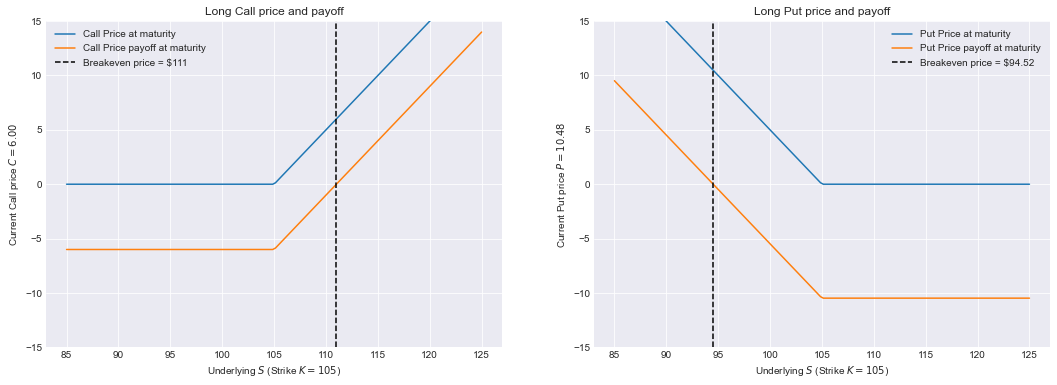

In [48]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(S, [c.price() for c in calls],     label="Call Price at maturity")
ax[0].plot(S, [c.price() for c in calls] - C, label="Call Price payoff at maturity")
ax[0].axvline(x=K + C, color="k", linestyle="--", label="Breakeven price = ${:.0f}".format(K+C))
ax[0].set_title("Long Call price and payoff")
ax[0].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[0].set_ylabel("Current Call price $C={:.2f}$".format(C))
ax[0].set_ylim([-15,15])
ax[0].grid()
ax[0].legend()

# Puts
ax[1].plot(S, [p.price() for p in puts],     label="Put Price at maturity")
ax[1].plot(S, [p.price() for p in puts] - P, label="Put Price payoff at maturity")
ax[1].axvline(x=K - P, color="k", linestyle="--", label="Breakeven price = ${:.2f}".format(K-P))
ax[1].set_title("Long Put price and payoff")
ax[1].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[1].set_ylabel("Current Put price $P={:.2f}$".format(P))
ax[1].set_ylim([-15,15])
ax[1].grid()
ax[1].legend()

plt.show()

### Short Call/Put

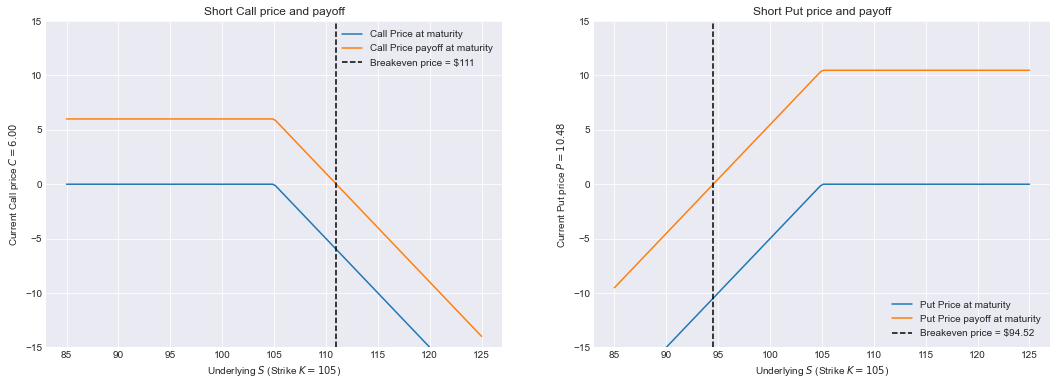

In [49]:
fig, ax = plt.subplots(1,2, figsize=(18,6)) 
ax = ax.flatten()

# Calls
ax[0].plot(S, [-c.price() for c in calls],     label="Call Price at maturity")
ax[0].plot(S, [-c.price() for c in calls] + C, label="Call Price payoff at maturity")
ax[0].axvline(x=K + C, color="k", linestyle="--", label="Breakeven price = ${:.0f}".format(K+C))
ax[0].set_title("Short Call price and payoff")
ax[0].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[0].set_ylabel("Current Call price $C={:.2f}$".format(C))
ax[0].set_ylim([-15,15])
ax[0].grid()
ax[0].legend()

# Puts
ax[1].plot(S, [-p.price() for p in puts],     label="Put Price at maturity")
ax[1].plot(S, [-p.price() for p in puts] + P, label="Put Price payoff at maturity")
ax[1].axvline(x=K - P, color="k", linestyle="--", label="Breakeven price = ${:.2f}".format(K-P))
ax[1].set_title("Short Put price and payoff")
ax[1].set_xlabel("Underlying $S$ (Strike $K={:.0f}$)".format(K))
ax[1].set_ylabel("Current Put price $P={:.2f}$".format(P))
ax[1].set_ylim([-15,15])
ax[1].grid()
ax[1].legend()

plt.show()

In [468]:
# Fix a strike and the rest of parameters
Smin  = 80
Smax  = 120
nres  = 100
S     = np.linspace(Smin,Smax,nres)
K     = 100
r     = 2
sigma = 2
q     = 0
T     = 0.1

# Calls and Puts
option = [BSOption("C", s, K, T, r/100, sigma/100, q=q) for s in S]

In [464]:
S = 90
option = BSOption("C", S, K, T, r/100, sigma/100, q=q)
price = option.price()
delta = option.delta()
Lambda = option.Lambda()
price, delta, Lambda, delta * S / price

(1.14992829796763e-236, 1.3231646560615337e-234, inf, 10355.847339004282)

In [469]:
lambdas = [o.Lambda() for o in option]

In [470]:
lambdas

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 1181.6036418928034,
 1079.6890005411722,
 978.9113299425829,
 879.4590833155868,
 781.5916584097956,
 685.6707244402598,
 592.2060400843047,
 501.9204526775568,
 415.8353783519955,
 335.3636512356621,
 262.35736862906464,
 198.98430741608075,
 147.24607848145018,
 108.0993581300984,
 80.6733160914434,
 62.44368762797593,
 50.41341838847763,
 42.20199964657132,
 36.31402997518302,
 31.896900153450922,
 28.461820700270028,
 25.71412906116784,
 23.466267217965846,
 21.593220635431834,
 20.008456913172857,
 18.650176897897982,
 17.473067249420367,
 16.44314685427735,
 15.53443274024158,
 14.726717692018319,
 14.00404987552839,
 13.353668700249992,
 12.76524480046443,
 12.230327346126202,
 11.741935567958427,
 11.29425242465971,
 10.882391806143218,
 10.502219470461

In [472]:
lambdas[min(np.where(np.array(lambdas) < +np.inf)[0])]

1181.6036418928034

In [408]:
price

4.1037046835332496e-16

In [409]:
10**(-13) / 10**(-16)

1000.0

In [410]:
-2.1327384303049257 / 4.1037046835332496

-0.5197105042336181

In [400]:
1e-18

1e-18

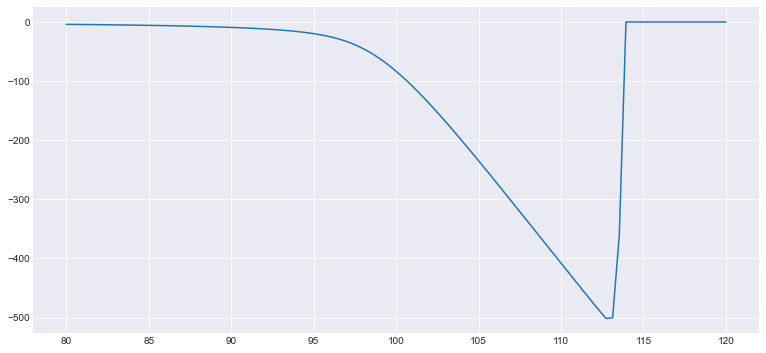

In [339]:
fig, ax = plt.subplots(1,1,figsize=(13,6))
greeks = [o.Lambda() for o in option]
ax.plot(S, greeks , color="tab:blue")
ax.grid()
plt.show()

Suppose a fixed underlying price $S$ and the rest of option parameters being fixed as well. Compute the current option price and the corresponding Lambda.

In [325]:
# Fixed underlying price
S1 = 100

# Option
option = BSOption("C", S1, K, T, r/100, sigma/100, q=q)

# Option price and lambda
Price1 = option.price()
Lambda = option.Lambda()

In [326]:
print("Current underlying price:\t{:.2f}".format(S1))
print("Current option price:\t\t{:.2f}".format(Price1))
print("Current option lambda:\t\t{:.2f}".format(Lambda))

Current underlying price:	100.00
Current option price:		4.78
Current option lambda:		11.17


The given value $\lambda$ of lambda means that is the underlying price has a return $r_S$, then the option price is about to change by $r_P = \lambda r_S$. 
Suppose $r_S = 1\%$.

In [327]:
# Change in the underlying price: 1%
rS = 0.01

# New underlying price
S2 = S1 * (1 + rS)

Then, the lambda predicts that with a $r_S=1\%$, then:

In [328]:
print("Option return (Lambda estimation): {:.2f}%".format(Lambda * rS * 100))

Option return (Lambda estimation): 11.17%


Let's double check. Re-compute the option with the new underlying price and see what is the new option price:

In [329]:
option = BSOption("C", S2, K, T, r/100, sigma/100, q=q)
Price2 = option.price()

print("New underlying price:\t{:.2f}".format(S2))
print("New option price:\t{:.2f}".format(Price2))

New underlying price:	101.00
New option price:	5.33


Look at the option percentage return:

In [330]:
rP = Price2 / Price1  - 1
print("Option return:\t{:.2f}%".format(rP*100))

Option return:	11.52%


Well, it is a close approximation. If the underlying return was smaller, the approximation would be even closer:

In [331]:
# Change in the underlying price: 0.5%
rS = 0.005

print("Option return (Lambda estimation):\t{:.2f}%".format(Lambda * rS * 100))

# New underlying price
S3 = S1 * (1 + rS)
# New option price
option = BSOption("C", S3, K, T, r/100, sigma/100, q=q)
Price3 = option.price()

print("New underlying price:\t\t\t{:.2f}".format(S3))
print("New option price:\t\t\t{:.2f}".format(Price3))

rP = Price3 / Price1  - 1
print("True option return:\t\t\t{:.2f}%".format(rP*100))

Option return (Lambda estimation):	5.58%
New underlying price:			100.50
New option price:			5.05
True option return:			5.67%


The difference now is smaller...